# Import Modules

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Import Data

In [2]:
names = ["id", "title", "year", "rating", "votes", "length", "genres"] # Column names
data = pd.read_csv("imdb_top_10000.txt", sep="\t", names=names, index_col=0)

data

,title,year,rating,votes,length,genres
id,,,,,,
tt0111161,The Shawshank Redemption (1994),1994,9.2,619479,142 mins.,Crime|Drama
tt0110912,Pulp Fiction (1994),1994,9.0,490065,154 mins.,Crime|Thriller
tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
...,...,...,...,...,...,...
tt0807721,Meduzot (2007),2007,7.0,1357,78 mins.,Drama
tt0339642,Daltry Calhoun (2005),2005,5.2,1357,100 mins.,Comedy|Drama|Music|Romance
tt0060880,The Quiller Memorandum (1966),1966,6.5,1356,104 mins.,Drama|Mystery|Thriller


# Plot Data

In [3]:
sns.set_style("darkgrid")

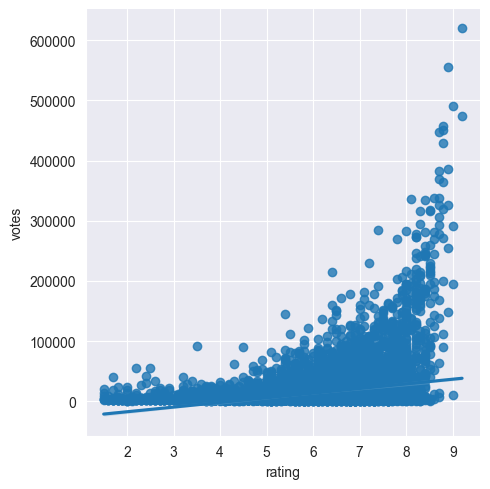

In [4]:
sns.lmplot(x="rating", y="votes", data=data)

<Axes: xlabel='rating', ylabel='votes'>

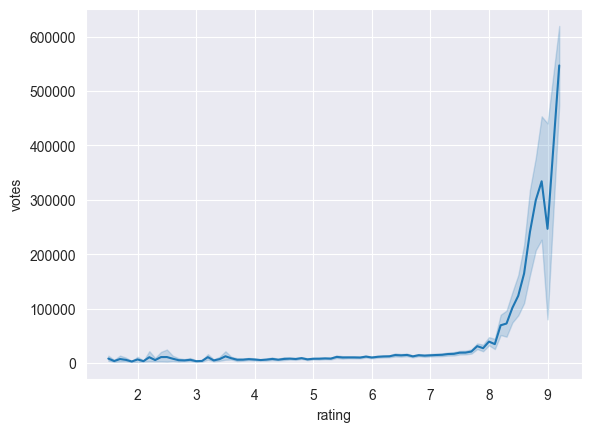

In [5]:
sns.lineplot(x="rating", y="votes", data=data)   

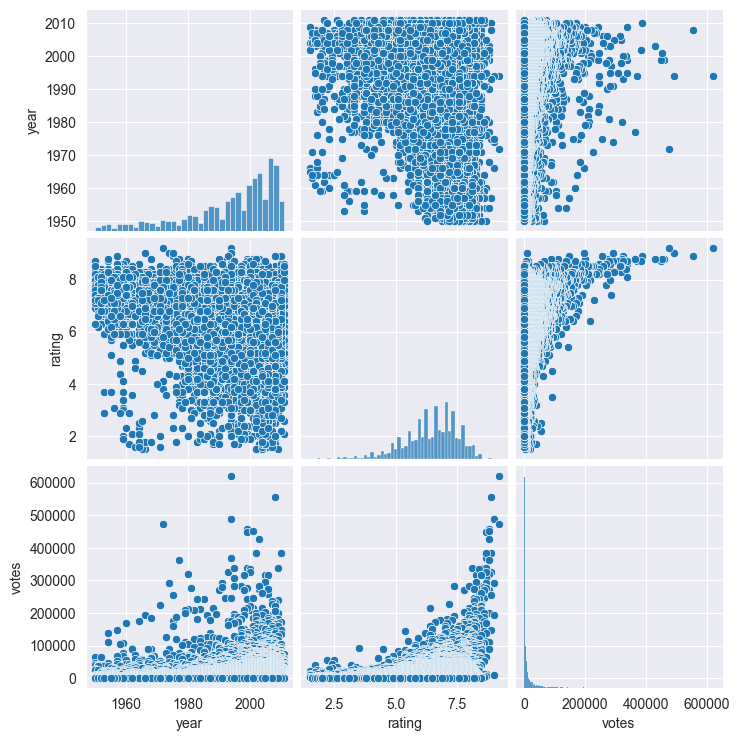

In [6]:
sns.pairplot(data)

# Ordinary Least Squares Regression

In [7]:
results = sm.OLS(data["rating"], data["votes"]).fit()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 rating   R-squared (uncentered):                   0.221
Model:                            OLS   Adj. R-squared (uncentered):              0.220
Method:                 Least Squares   F-statistic:                              2829.
Date:                Fri, 17 Mar 2023   Prob (F-statistic):                        0.00
Time:                        00:27:24   Log-Likelihood:                         -31655.
No. Observations:               10000   AIC:                                  6.331e+04
Df Residuals:                    9999   BIC:                                  6.332e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
votes       7.956e-05    1.5e-06     53.190      0.000    7.66e-05    8.25e-05
==============================================================================
Omnibus:                     9919.237   Durbin-Watson:                   0.082
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           762189.305
Skew:                          -4.757   Prob(JB):                         0.00
Kurtosis:                      44.698   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Advanced Data Selection

In [9]:
data[data["year"] > 1995]

,title,year,rating,votes,length,genres
id,,,,,,
tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
tt1375666,Inception (2010),2010,8.9,385149,148 mins.,Action|Adventure|Sci-Fi|Thriller
tt0169547,American Beauty (1999),1999,8.6,338332,122 mins.,Drama
tt0499549,Avatar (2009),2009,8.1,336855,162 mins.,Action|Adventure|Fantasy|Sci-Fi
...,...,...,...,...,...,...
tt0118635,Aprile (1998),1998,6.7,1358,78 mins.,Comedy
tt0807721,Meduzot (2007),2007,7.0,1357,78 mins.,Drama
tt0339642,Daltry Calhoun (2005),2005,5.2,1357,100 mins.,Comedy|Drama|Music|Romance


In [10]:
data[(data["year"] > 1995) & (data["year"] < 2000)].sort_values("rating", ascending=False).head(10)

,title,year,rating,votes,length,genres
id,,,,,,
tt0137523,Fight Club (1999),1999,8.8,458173,139 mins.,Drama|Mystery|Thriller
tt0133093,The Matrix (1999),1999,8.7,448114,136 mins.,Action|Adventure|Sci-Fi
tt0120586,American History X (1998),1998,8.6,270082,119 mins.,Crime|Drama
tt0169547,American Beauty (1999),1999,8.6,338332,122 mins.,Drama
tt0118799,Life Is Beautiful (1997),1997,8.5,131578,116 mins.,Comedy|Drama|Romance|War
tt0120815,Saving Private Ryan (1998),1998,8.5,317912,169 mins.,Action|Drama|History|War
tt0119488,L.A. Confidential (1997),1997,8.4,187115,138 mins.,Crime|Drama|Mystery|Thriller
tt0119698,Princess Mononoke (1997),1997,8.4,77859,134 mins.,Animation|Adventure|Fantasy
tt0120689,The Green Mile (1999),1999,8.4,243660,189 mins.,Crime|Drama|Fantasy|Mystery
